# High Order Fuzzy Time Series 


# Common Imports

In [1]:
import matplotlib.pylab as plt
from pyFTS.benchmarks import benchmarks as bchmk
from pyFTS.models import hofts

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/usr/lib/python3/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# Data Loading

In [2]:
from pyFTS.data import Enrollments

enrollments = Enrollments.get_data()

# Exploring the partitioning effects on original data

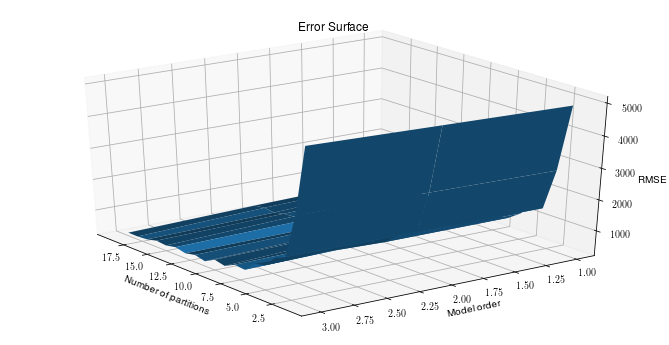

In [3]:
tmp = bchmk.simpleSearch_RMSE(enrollments, enrollments, hofts.HighOrderFTS, range(1,20), [1, 2, 3], tam=[10, 5])

# Exploring the partitioning effects on transformed data

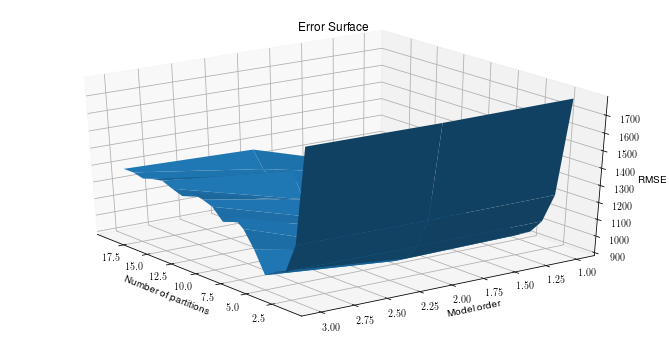

In [4]:
from pyFTS.common import Transformations
diff = Transformations.Differential(1)

tmp = bchmk.simpleSearch_RMSE(enrollments, enrollments, hofts.HighOrderFTS, range(1,20), [1, 2, 3], 
                              transformation=diff, tam=[10, 5])

# Comparing the partitioning schemas

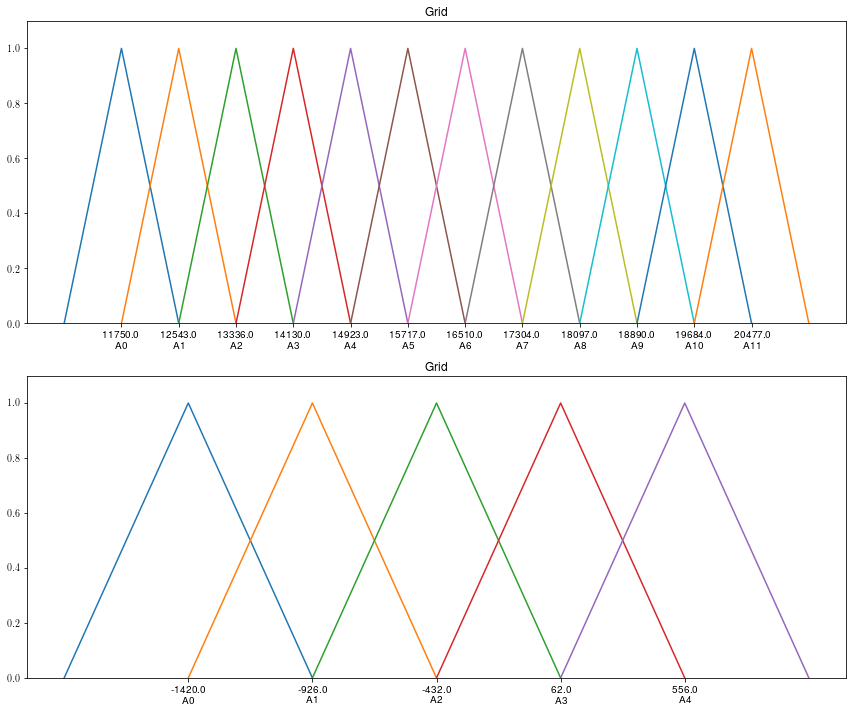

In [5]:
from pyFTS.partitioners import Grid, Util as pUtil

fuzzy_sets = Grid.GridPartitioner(enrollments, 12)
fuzzy_sets2 = Grid.GridPartitioner(enrollments, 5, transformation=diff)

pUtil.plot_partitioners(enrollments, [fuzzy_sets,fuzzy_sets2])

# Fitting a model on original data

In [13]:
model1 = hofts.HighOrderFTS("FTS", partitioner=fuzzy_sets)
model1.fit(enrollments, order=3)

print(model1)

High Order FTS:
A1, A2, A2 -> A3,A4
A1, A2, A3 -> A3,A4
A1, A3, A2 -> A3,A4
A1, A3, A3 -> A3,A4
A10, A10, A10 -> A8,A9
A10, A10, A9 -> A8,A9
A10, A9, A10 -> A8,A9
A10, A9, A9 -> A8,A9
A2, A2, A2 -> A3,A4
A2, A2, A3 -> A3,A4,A5
A2, A2, A4 -> A4,A5
A2, A3, A2 -> A3,A4
A2, A3, A3 -> A3,A4,A5
A2, A3, A4 -> A4,A5
A2, A3, A5 -> A4,A5
A2, A4, A4 -> A4,A5
A2, A4, A5 -> A4,A5
A3, A2, A3 -> A4,A5
A3, A2, A4 -> A4,A5
A3, A3, A3 -> A4,A5
A3, A3, A4 -> A4,A5
A3, A3, A5 -> A4,A5
A3, A4, A4 -> A4,A5
A3, A4, A5 -> A4,A5
A3, A5, A4 -> A4,A5
A3, A5, A5 -> A4,A5
A4, A4, A4 -> A4,A5,A6
A4, A4, A5 -> A4,A5,A6,A7
A4, A4, A6 -> A6,A7
A4, A5, A4 -> A4,A5,A6
A4, A5, A5 -> A4,A5,A6,A7
A4, A5, A6 -> A6,A7,A8,A9
A4, A5, A7 -> A6,A7,A8,A9
A4, A6, A6 -> A6,A7,A8,A9
A4, A6, A7 -> A6,A7,A8,A9
A5, A4, A4 -> A4,A5,A6
A5, A4, A5 -> A4,A5,A6,A7
A5, A4, A6 -> A6,A7
A5, A5, A4 -> A4,A5,A6
A5, A5, A5 -> A4,A5,A6,A7
A5, A5, A6 -> A6,A7,A8,A9
A5, A5, A7 -> A6,A7,A8,A9
A5, A6, A6 -> A5,A6,A7,A8,A9
A5, A6, A7 -> A5,A6,A7,A8,A9


# Fitting a model on transformed data

In [14]:
model2 = hofts.HighOrderFTS("FTS Diff", partitioner=fuzzy_sets2)
model2.append_transformation(diff)
model2.fit(enrollments, order=3)

print(model2)

High Order FTS:
A0, A1, A2 -> A2,A3
A0, A1, A3 -> A2,A3
A0, A2, A2 -> A2,A3
A0, A2, A3 -> A2,A3,A4
A0, A2, A4 -> A4
A0, A3, A3 -> A4
A0, A3, A4 -> A4
A1, A0, A1 -> A2,A3
A1, A0, A2 -> A2,A3
A1, A1, A0 -> A1,A2
A1, A1, A1 -> A1,A2,A3
A1, A1, A2 -> A2,A3
A1, A1, A3 -> A2,A3
A1, A1, A4 -> A2,A3
A1, A2, A0 -> A1,A2
A1, A2, A1 -> A1,A2
A1, A2, A2 -> A1,A2,A3,A4
A1, A2, A3 -> A2,A3,A4
A1, A2, A4 -> A2,A3,A4
A1, A3, A1 -> A1,A2
A1, A3, A2 -> A1,A2,A3,A4
A1, A3, A3 -> A2,A3,A4
A1, A3, A4 -> A4
A1, A4, A2 -> A2,A3
A1, A4, A3 -> A2,A3
A2, A0, A1 -> A2,A3
A2, A0, A2 -> A2,A3,A4
A2, A0, A3 -> A3,A4
A2, A1, A0 -> A1,A2
A2, A1, A1 -> A0,A1,A2,A3,A4
A2, A1, A2 -> A0,A1,A2,A3,A4
A2, A1, A3 -> A1,A2,A3,A4
A2, A1, A4 -> A2,A3
A2, A2, A0 -> A1,A2,A3
A2, A2, A1 -> A0,A1,A2,A3,A4
A2, A2, A2 -> A0,A1,A2,A3,A4
A2, A2, A3 -> A1,A2,A3,A4
A2, A2, A4 -> A2,A3
A2, A3, A0 -> A2,A3
A2, A3, A1 -> A1,A2,A3
A2, A3, A2 -> A1,A2,A3,A4
A2, A3, A3 -> A1,A2,A3,A4
A2, A3, A4 -> A2,A3
A2, A4, A2 -> A1,A2,A3
A2, A4, A3 -> A1,

# Using the models

In [15]:
model1.predict(enrollments)

[14923.233333333337,
 15319.950000000004,
 15319.950000000004,
 15716.666666666672,
 16113.383333333339,
 16113.383333333339,
 17700.250000000007,
 17303.53333333334,
 15716.666666666672,
 15319.950000000004,
 15319.950000000004,
 15716.666666666672,
 15716.666666666672,
 16113.383333333339,
 17700.250000000007,
 19287.116666666676,
 19287.116666666676,
 19287.116666666676,
 18890.40000000001,
 18493.68333333334]

In [16]:
model2.predict(enrollments)

[13435.14,
 14264.14,
 15028.14,
 15126.2,
 15418.2,
 15429.14,
 16375.14,
 16734.2,
 16944.38,
 15248.2,
 15806.32,
 14960.2,
 14978.2,
 15305.08,
 16427.14,
 17471.08,
 18785.2,
 19143.2,
 19399.260000000002,
 18691.2]

# Comparing the models

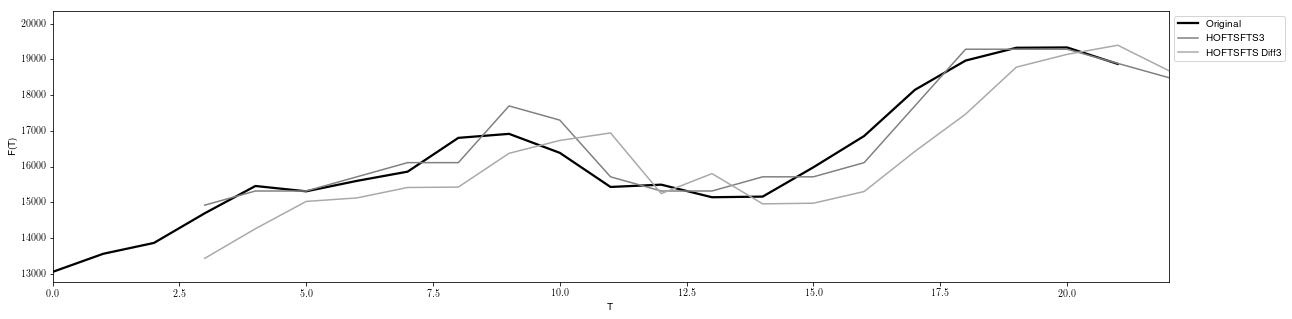

In [17]:
bchmk.plot_compared_series(enrollments, [model1, model2], bchmk.colors, intervals=False)

In [18]:
bchmk.print_point_statistics(enrollments, [model1, model2])

Model		& Order     & RMSE		& SMAPE      & Theil's U		\\ 
HOFTSFTS		& 3		& 426.81		& 0.99		& 0.7	\\ 
HOFTSFTS Diff		& 3		& 970.87		& 2.53		& 1.58	\\ 



# Residual Analysis

In [12]:
from pyFTS.benchmarks import ResidualAnalysis as ra

ra.plot_residuals(enrollments, [model1, model2])

ValueError: cannot convert float NaN to integer